In [1]:
import pandas as pd
import geopandas as gpd
from Visual import MapViser
import numpy as np
from shapely.geometry import Polygon
import matplotlib.pyplot as plt

In [4]:
world_land = gpd.read_file('./data/geo/Base/world_land.shp')
desert = gpd.read_file('./data/geo/desert/desert.shp')

In [5]:
map_vis = MapViser()

In [6]:
vre = pd.read_csv('./data/vre/vre_attr.csv')

pue = pd.read_pickle('E:\\OneDrive\\Project\\OnshorePowerAIDC\\res\\idc_pue_prof_air_cooled_2019.pkl')

In [7]:
vre['pue'] = -1.0
vre['pue_max'] = -1.0
vre['pue_min'] = -1.0

for i,r in vre.iterrows():
    vre.at[i,'pue'] = np.mean(pue[(r['lon'],r['lat'])])
    vre.at[i,'pue_max'] = np.max(pue[(r['lon'],r['lat'])])
    vre.at[i,'pue_min'] = np.min(pue[(r['lon'],r['lat'])])

In [8]:
geo = []

for i,r in vre.iterrows():
    geo.append(Polygon([
        (r['lon'],r['lat']),
        (r['lon']+0.25,r['lat']),
        (r['lon']+0.25,r['lat']-0.25),
        (r['lon'],r['lat']-0.25)
    ]))
    
vre_gdf = gpd.GeoDataFrame(vre,geometry=geo,crs='EPSG:4326')

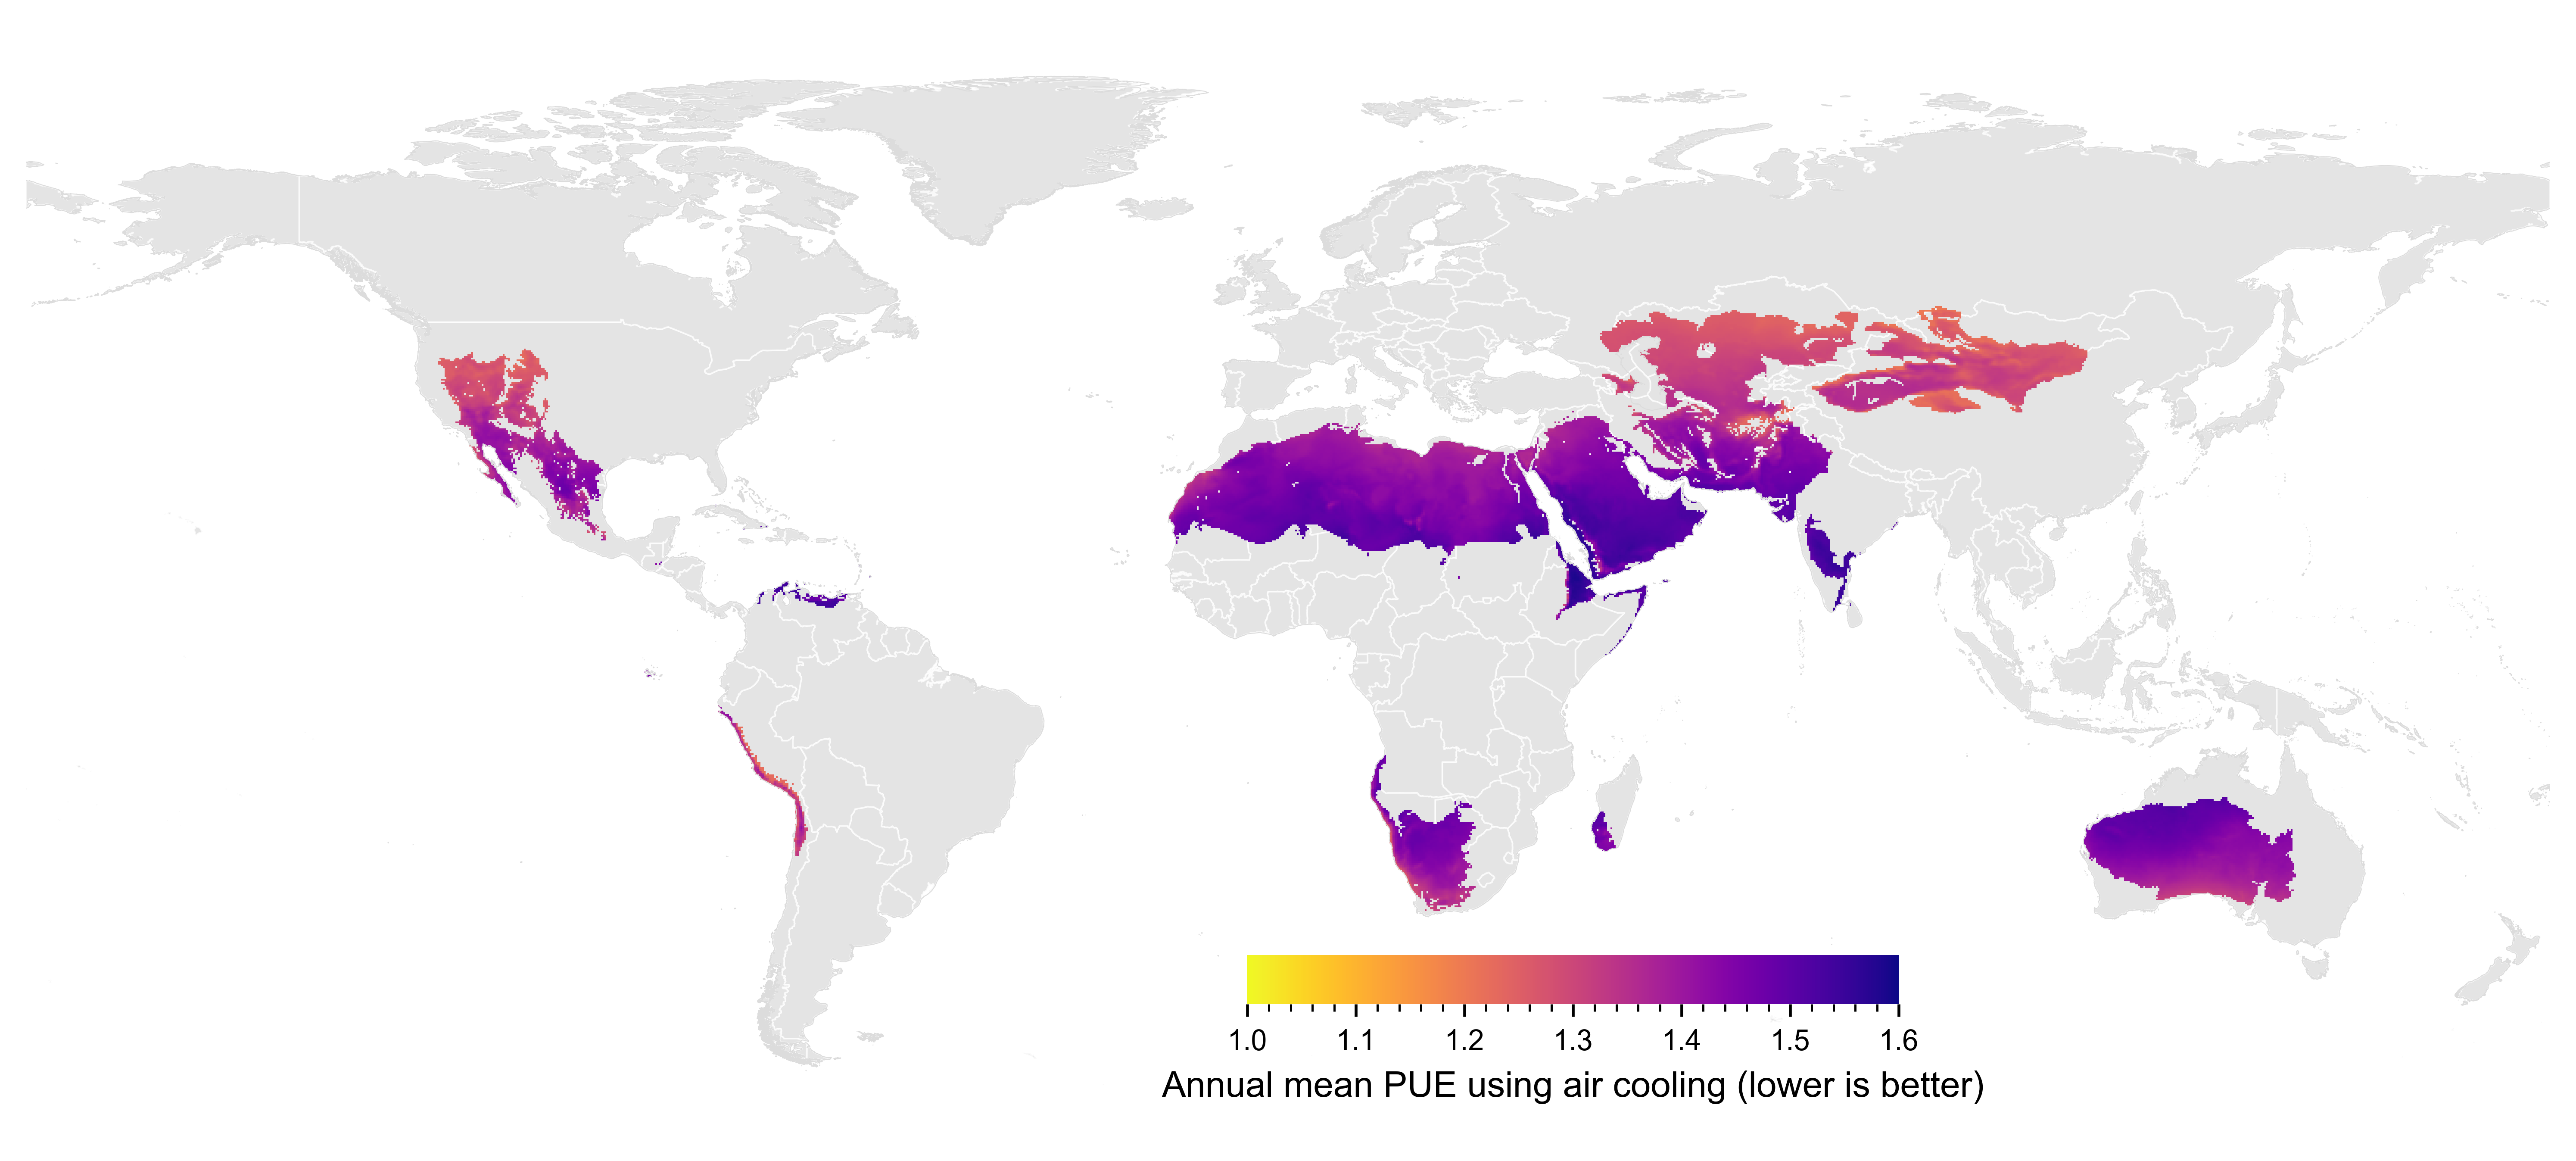

In [9]:

map_vis.set_font()

map_vis.set_bound_color('gainsboro')

fig,ax = map_vis.draw_attr_map(vis_shp=vre_gdf,
                                attr_col='pue',
                                cmap='plasma_r',
                                ub=1.6,
                                lb=1,
                                with_cbar=False,
                                bound_mode=2,
                                return_fig=True)

ax.set_xlim(-180,180)

map_vis.add_colorbar(fig=fig, 
                     loc=[0.5,0.3,0.2,0.0225],
                     vmax=1.6,
                     vmin=1,
                     cmap='plasma_r',
                     extend=None,
                     orientation='horizontal',
                     label='Annual mean PUE using air cooling (lower is better)')

plt.savefig('./data/fig/Vis/desert_pue_mean.png',bbox_inches='tight')